In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data/penguins.csv', index_col=0)

In [ ]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male,2009
329,Chinstrap,Dream,43.5,18.1,202,3400,female,2009
330,Chinstrap,Dream,49.6,18.2,193,3775,male,2009
331,Chinstrap,Dream,50.8,19.0,210,4100,male,2009


In [ ]:
data['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 23.4+ KB


In [ ]:
y=data['species']

In [ ]:
y=y.map({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species, Length: 333, dtype: int64

In [ ]:
x=data.drop(columns=['species'])

In [ ]:
x

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Torgersen,39.1,18.7,181,3750,male,2007
1,Torgersen,39.5,17.4,186,3800,female,2007
2,Torgersen,40.3,18.0,195,3250,female,2007
3,Torgersen,36.7,19.3,193,3450,female,2007
4,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...
328,Dream,55.8,19.8,207,4000,male,2009
329,Dream,43.5,18.1,202,3400,female,2009
330,Dream,49.6,18.2,193,3775,male,2009
331,Dream,50.8,19.0,210,4100,male,2009


In [ ]:
x['sex']=x['sex'].map({'male':0,'female':1})

In [ ]:
x

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Torgersen,39.1,18.7,181,3750,0,2007
1,Torgersen,39.5,17.4,186,3800,1,2007
2,Torgersen,40.3,18.0,195,3250,1,2007
3,Torgersen,36.7,19.3,193,3450,1,2007
4,Torgersen,39.3,20.6,190,3650,0,2007
...,...,...,...,...,...,...,...
328,Dream,55.8,19.8,207,4000,0,2009
329,Dream,43.5,18.1,202,3400,1,2009
330,Dream,49.6,18.2,193,3775,0,2009
331,Dream,50.8,19.0,210,4100,0,2009


In [ ]:
x['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
df_encoded=pd.get_dummies(x,columns=['island'])

In [ ]:
df_encoded

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181,3750,0,2007,False,False,True
1,39.5,17.4,186,3800,1,2007,False,False,True
2,40.3,18.0,195,3250,1,2007,False,False,True
3,36.7,19.3,193,3450,1,2007,False,False,True
4,39.3,20.6,190,3650,0,2007,False,False,True
...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207,4000,0,2009,False,True,False
329,43.5,18.1,202,3400,1,2009,False,True,False
330,49.6,18.2,193,3775,0,2009,False,True,False
331,50.8,19.0,210,4100,0,2009,False,True,False


In [ ]:
x=df_encoded

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    int64  
 3   body_mass_g        333 non-null    int64  
 4   sex                333 non-null    int64  
 5   year               333 non-null    int64  
 6   island_Biscoe      333 non-null    bool   
 7   island_Dream       333 non-null    bool   
 8   island_Torgersen   333 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 19.2 KB


In [ ]:
x,y

(     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  year  \
 0              39.1           18.7                181         3750    0  2007   
 1              39.5           17.4                186         3800    1  2007   
 2              40.3           18.0                195         3250    1  2007   
 3              36.7           19.3                193         3450    1  2007   
 4              39.3           20.6                190         3650    0  2007   
 ..              ...            ...                ...          ...  ...   ...   
 328            55.8           19.8                207         4000    0  2009   
 329            43.5           18.1                202         3400    1  2009   
 330            49.6           18.2                193         3775    0  2009   
 331            50.8           19.0                210         4100    0  2009   
 332            50.2           18.7                198         3775    1  2009   
 
      island_B

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
forest=RandomForestClassifier(n_estimators=20,random_state=100)

In [ ]:
forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=100)

In [ ]:
forest.score(x_train,y_train)

1.0

In [ ]:
forest.score(x_test,y_test)

0.9402985074626866

In [ ]:
decision=tree.DecisionTreeClassifier(max_depth=3,random_state=1)
decision.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
decision.score(x_train,y_train)

0.9887218045112782

In [ ]:
decision.score(x_test,y_test)

0.9253731343283582

## Plotting tree

[Text(0.5416666666666666, 0.875, 'x[2] <= 207.5\ngini = 0.638\nsamples = 266\nvalue = [118, 93, 55]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 43.05\ngini = 0.43\nsamples = 169\nvalue = [117, 1, 51]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 16.65\ngini = 0.017\nsamples = 114\nvalue = [113, 0, 1]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 0, 1]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 105\nvalue = [105, 0, 0]'),
 Text(0.5, 0.375, 'x[7] <= 0.5\ngini = 0.168\nsamples = 55\nvalue = [4, 1, 50]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.038\nsamples = 51\nvalue = [1, 0, 50]'),
 Text(0.75, 0.625, 'x[1] <= 17.65\ngini = 0.099\nsamples = 97\nvalue = [1, 92, 4]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 92\nvalue = [0, 92, 0]'),
 Text(0.8333333333333334, 0.375, 'x[0] <= 46.55\ngini = 0.32\nsamples = 5\nvalue = [1, 0, 4]'),
 Text(0.75, 0.125, 'gini = 0.0

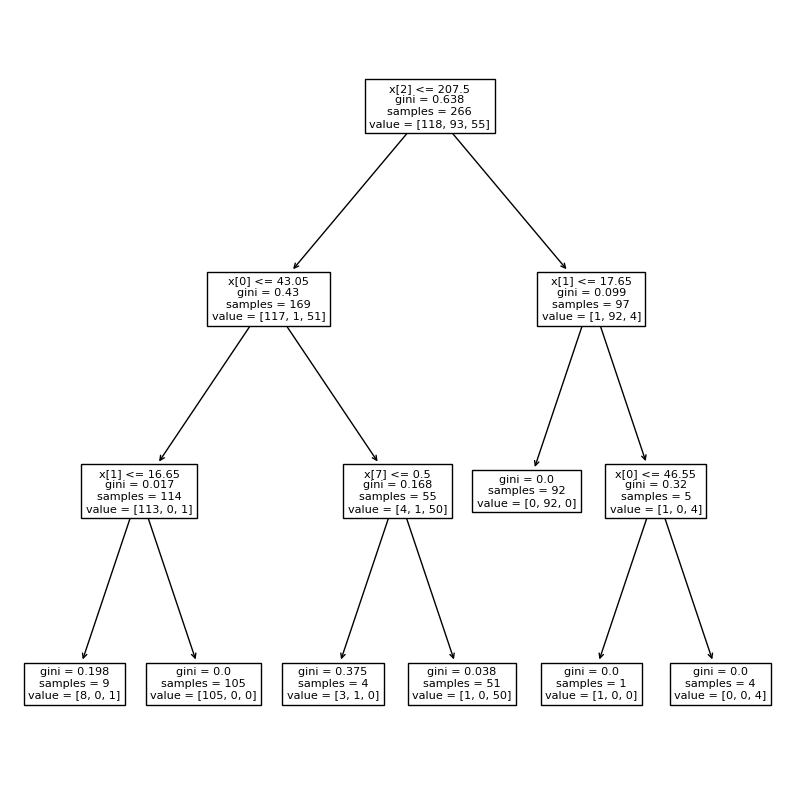

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(decision)

In [ ]:
forest.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=186422792),
 DecisionTreeClassifier(max_features='sqrt', random_state=735107864),
 DecisionTreeClassifier(max_features='sqrt', random_state=1195587395),
 DecisionTreeClassifier(max_features='sqrt', random_state=1769725799),
 DecisionTreeClassifier(max_features='sqrt', random_state=1823289175),
 DecisionTreeClassifier(max_features='sqrt', random_state=113311823),
 DecisionTreeClassifier(max_features='sqrt', random_state=1480802224),
 DecisionTreeClassifier(max_features='sqrt', random_state=638252938),
 DecisionTreeClassifier(max_features='sqrt', random_state=20267358),
 DecisionTreeClassifier(max_features='sqrt', random_state=673068980),
 DecisionTreeClassifier(max_features='sqrt', random_state=522135394),
 DecisionTreeClassifier(max_features='sqrt', random_state=800870453),
 DecisionTreeClassifier(max_features='sqrt', random_state=733361730),
 DecisionTreeClassifier(max_features='sqrt', random_state=902405858),
 DecisionTreeClas

# **To see the individual tree**

[Text(0.625, 0.9166666666666666, 'x[2] <= 207.5\ngini = 0.631\nsamples = 161\nvalue = [115, 103, 48]'),
 Text(0.4166666666666667, 0.75, 'x[0] <= 43.35\ngini = 0.4\nsamples = 97\nvalue = [115, 1, 42]'),
 Text(0.25, 0.5833333333333334, 'x[1] <= 16.7\ngini = 0.017\nsamples = 68\nvalue = [114, 0, 1]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[0] <= 40.45\ngini = 0.198\nsamples = 5\nvalue = [8, 0, 1]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [8, 0, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 63\nvalue = [106, 0, 0]'),
 Text(0.5833333333333334, 0.5833333333333334, 'x[6] <= 0.5\ngini = 0.09\nsamples = 29\nvalue = [1, 1, 41]'),
 Text(0.5, 0.4166666666666667, 'x[0] <= 46.1\ngini = 0.046\nsamples = 28\nvalue = [1, 0, 41]'),
 Text(0.4166666666666667, 0.25, 'x[3] <= 4175.0\ngini = 0.245\nsamples = 5\nvalue = [1, 0, 6]'),
 Text(0.3333333333333333, 0.08333333333333333,

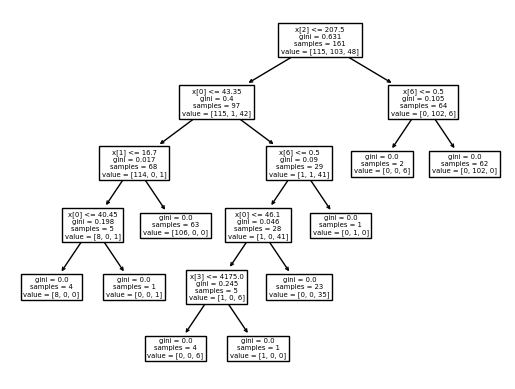

In [ ]:
tree.plot_tree(forest.estimators_[1])

[Text(0.4230769230769231, 0.9166666666666666, 'x[0] <= 42.4\ngini = 0.613\nsamples = 168\nvalue = [130, 93, 43]'),
 Text(0.15384615384615385, 0.75, 'x[1] <= 14.5\ngini = 0.046\nsamples = 77\nvalue = [125, 2, 1]'),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0]'),
 Text(0.23076923076923078, 0.5833333333333334, 'x[2] <= 187.5\ngini = 0.016\nsamples = 76\nvalue = [125, 0, 1]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[0] <= 40.75\ngini = 0.036\nsamples = 32\nvalue = [54, 0, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 28\nvalue = [48, 0, 0]'),
 Text(0.23076923076923078, 0.25, 'x[3] <= 3312.5\ngini = 0.245\nsamples = 4\nvalue = [6, 0, 1]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [6, 0, 0]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.0\nsamples = 44\nvalue = [71, 0, 0]'),
 

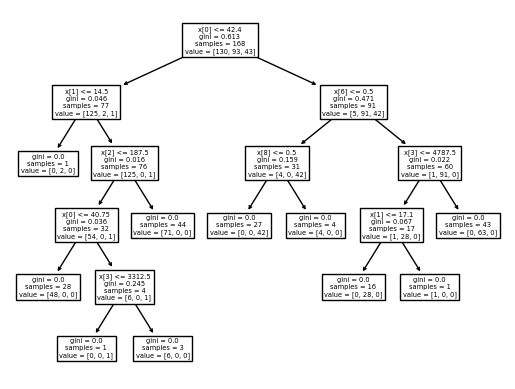

In [ ]:
tree.plot_tree(forest.estimators_[2])

# To predict

In [ ]:
x.iloc[3]

bill_length_mm        36.7
bill_depth_mm         19.3
flipper_length_mm      193
body_mass_g           3450
sex                      1
year                  2007
island_Biscoe        False
island_Dream         False
island_Torgersen      True
Name: 3, dtype: object

In [ ]:
data_user=[[36.7, 19.3, 193, 3450, 1, 2007, 0, 0, 1]]

In [ ]:
ans=forest.predict(data_user)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y.iloc[3]

0

In [ ]:
ans

array([0])